<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/ImageSize_256_2_DenseNet121(public-%2C%20private-).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Sep  9 16:16:02 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWi3NwtM3fhH2Wg5IRKEIQw6SMEuoCNvCjWJtoOHs9khNZJ7coZYCXo


In [ ]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/test.csv')

In [ ]:
!mkdir images_train
!mkdir images_train/0
!mkdir images_train/1
!mkdir images_train/2
!mkdir images_train/3
!mkdir images_train/4
!mkdir images_train/5
!mkdir images_train/6
!mkdir images_train/7
!mkdir images_train/8
!mkdir images_train/9
!mkdir images_test

In [ ]:
import cv2

for idx in range(len(train)) :
    img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
    digit = train.loc[idx, 'digit']
    cv2.imwrite(f'./images_train/{digit}/{train["id"][idx]}.png', img)

In [ ]:
import cv2

for idx in range(len(test)) :
    img = test.loc[idx, '0':].values.reshape(28, 28).astype(int)
    cv2.imwrite(f'./images_test/{test["id"][idx]}.png', img)

In [ ]:
import tensorflow as tf
DenseNet121_model = tf.keras.applications.DenseNet121(weights=None, include_top=True, input_shape=(256, 256, 1), classes=10)

In [ ]:
from tensorflow.keras.optimizers import Adam
DenseNet121_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.002,epsilon=None), metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                             rescale=1./255, 
                             validation_split=0.2,
                             rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1)

train_generator = datagen.flow_from_directory('./images_train', target_size=(256,256), color_mode='grayscale', class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory('./images_train', target_size=(256,256), color_mode='grayscale', class_mode='categorical', subset='validation')

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'/content/drive/MyDrive/DACON_CVLC/Checkpoint/IS_256_2_DN121.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [11]:
DenseNet121_model.fit_generator(train_generator, epochs = 500, validation_data = val_generator, callbacks = [checkpoint])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/500
52/52 [==============================] - 57s 551ms/step - loss: 1.9324 - accuracy: 0.3051 - val_loss: 6.1350 - val_accuracy: 0.1232

Epoch 00001: val_accuracy improved from -inf to 0.12315, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint/IS_256_2_DN121.h5
Epoch 2/500
52/52 [==============================] - 23s 448ms/step - loss: 1.2770 - accuracy: 0.5499 - val_loss: 16.3286 - val_accuracy: 0.1010

Epoch 00002: val_accuracy did not improve from 0.12315
Epoch 3/500
52/52 [==============================] - 24s 452ms/step - loss: 1.0104 - accuracy: 0.6620 - val_loss: 5.4502 - val_accuracy: 0.1330

Epoch 00003: val_accuracy improved from 0.12315 to 0.13300, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint/IS_256_2_DN121.h5
Epoch 4/500
52/52 [==============================] - 24s 457ms/step - loss: 0.8661 - accuracy: 0.7132 - val_loss: 6.6849 - val_accuracy: 0.1700

Epoch 00004: val_accuracy improved from 0.13300 to 0.16995, saving model to /content/driv

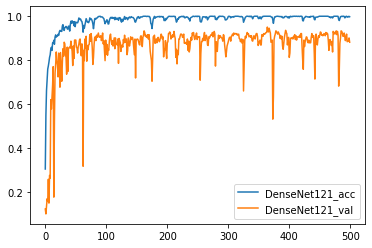

In [12]:
import matplotlib.pyplot as plt

plt.plot(DenseNet121_model.history.history["accuracy"], label='DenseNet121_acc')
plt.plot(DenseNet121_model.history.history["val_accuracy"], label='DenseNet121_val')

plt.legend()
plt.show()

In [13]:
DenseNet121_model = tf.keras.models.load_model('/content/drive/MyDrive/DACON_CVLC/Checkpoint/IS_256_2_DN121.h5', compile=False)

In [ ]:
!mkdir images_test/none
!mv images_test/*.png images_test/none

In [ ]:
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory('./images_test', target_size=(256,256), color_mode='grayscale', class_mode='categorical', shuffle=False)

In [16]:
DenseNet121_predict = DenseNet121_model.predict_generator(test_generator).argmax(axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')

In [ ]:
import numpy as np
mylist = []

for i in range(len(submission)):
    name =  test_generator.filenames
    id = name[i].split('/')[1].rstrip('.').split('.')[0]
    mylist.append(id)

In [ ]:
for i in range(len(submission)):
    submission["id"][i] = mylist[i]

In [20]:
submission["DenseNet121_predict"] = DenseNet121_predict

In [21]:
from collections import Counter

for i in range(len(submission)) :
    predicts = submission.loc[i, ['DenseNet121_predict']]
    submission.at[i, "digit"] = Counter(predicts).most_common(n=1)[0][0]

In [ ]:
submission = submission[['id', 'digit']]
submission.head()

In [23]:
from google.colab import files

submission.to_csv('/content/drive/MyDrive/DACON_CVLC/Submission/ImageSize_256_2_DenseNet121_model.csv', index=False)
files.download('/content/drive/MyDrive/DACON_CVLC/Submission/ImageSize_256_2_DenseNet121_model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>